In [1]:
import matplotlib.pyplot as plt
from firedrake import *

In [2]:
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "Lagrange", 1)

In [3]:
x, y = SpatialCoordinate(mesh)
u_exact = sin(pi*x)*sin(pi*y)
f = 2*pi**2*u_exact

u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

In [4]:
boundary_ids = (1, 2, 3, 4)
bcs = DirichletBC(V, 0, boundary_ids)

In [5]:
uh = Function(V)
solve(a == L, uh, bcs=bcs, solver_parameters={"ksp_type": "cg", "pc_type": "none"})

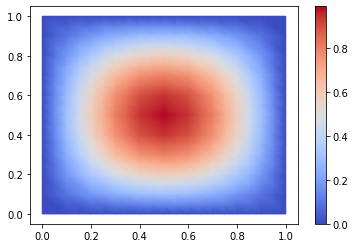

In [6]:
fig, axes = plt.subplots()
collection = tripcolor(uh, axes=axes, cmap='coolwarm')
fig.colorbar(collection);


Exercises

Most of the time, we don't want to impose the same Dirichlet condition everywhere. Instead of solving with homogeneous Dirichlet conditions everywhere, solve the following problem.

Find u

such that
$−∇2u=0 \in Ω=[0,1]×[0,1],u=1 on Γ1,u=2 on Γ2,∇u⋅n =0 on Γ∖(Γ1∪Γ2)$

where Γ1
is the plane y=0 and Γ2 is the plane y=1

.

    Hint 1: To provide a zero right hand side, you'll need to write Constant(0)*v*dx.
    Hint 2: Use help to remind youself of the boundary markers for meshes.
    Hint 3: The bcs argument to solve can be a list of boundary conditions.
    Hint 4: You can check your answer against the exact solution u∗=1+y

.

In [8]:
help(UnitSquareMesh)

Help on cython_function_or_method in module firedrake.utility_meshes:

UnitSquareMesh(nx, ny, reorder=None, diagonal='left', quadrilateral=False, distribution_parameters=None, comm=<mpi4py.MPI.Intracomm object at 0x117fb8450>)
    Generate a unit square mesh
    
    :arg nx: The number of cells in the x direction
    :arg ny: The number of cells in the y direction
    :kwarg quadrilateral: (optional), creates quadrilateral mesh, defaults to False
    :kwarg reorder: (optional), should the mesh be reordered
    :kwarg comm: Optional communicator to build the mesh on (defaults to
        COMM_WORLD).
    
    The boundary edges in this mesh are numbered as follows:
    
    * 1: plane x == 0
    * 2: plane x == 1
    * 3: plane y == 0
    * 4: plane y == 1



In [19]:
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "Lagrange", 1)

x, y = SpatialCoordinate(mesh)
# u_exact = sin(pi*x)*sin(pi*y)
f = 2*pi**2*u_exact

u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(u), grad(v))*dx
L = Constant(0)*v*dx

bcs = (DirichletBC(V, 1, 3), DirichletBC(V, 2, 4))

uh = Function(V)
solve(a == L, uh, bcs=bcs, solver_parameters={"ksp_type": "cg", "pc_type": "none"})

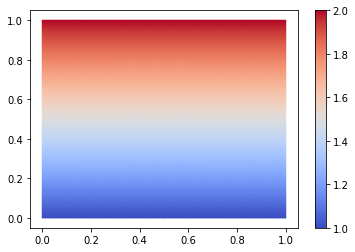

In [20]:
fig, axes = plt.subplots()
collection = tripcolor(uh, axes=axes, cmap='coolwarm')
fig.colorbar(collection);

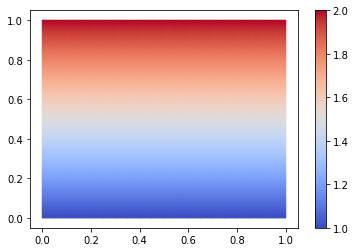

In [21]:
u_exact = 1+y
fig, axes = plt.subplots()
collection = tripcolor(interpolate(u_exact, V), axes=axes, cmap='coolwarm')
fig.colorbar(collection);

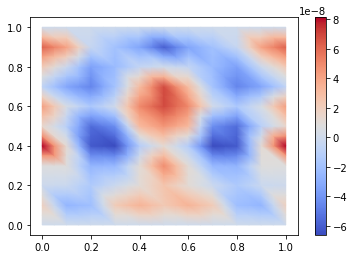

In [22]:
difference = assemble(interpolate(u_exact, V) - uh)
fig, axes = plt.subplots()
collection = tripcolor(difference, axes=axes, cmap='coolwarm')
fig.colorbar(collection);